In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timezone
import netCDF4
import os
import json
from plot_functions import extract_data_from_output_file ,extract_timeseries_from_output_file_by_coordinates, plot_heatmap, plot_transect, plot_timeseries, plot_xy_heatmap

In [2]:
model = 'geneva_1month'

In [3]:
with open('config_plots.json', 'r') as file:
    config_plots = json.load(file)[model]

output_file = config_plots['file_nc_map']

In [10]:
import xarray as xr
ds = xr.open_dataset(output_file)

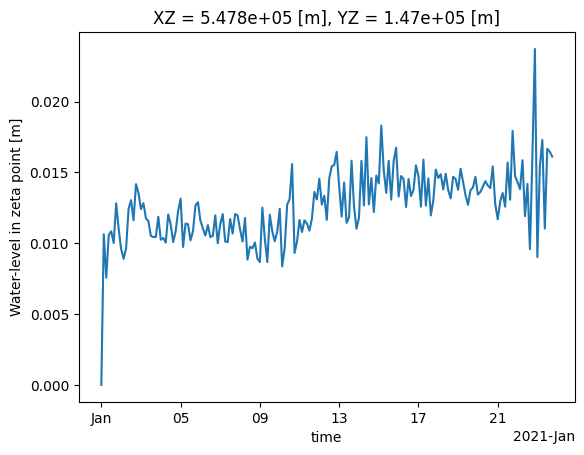

In [17]:
ds['S1'].sel(M=31, N=96).plot()

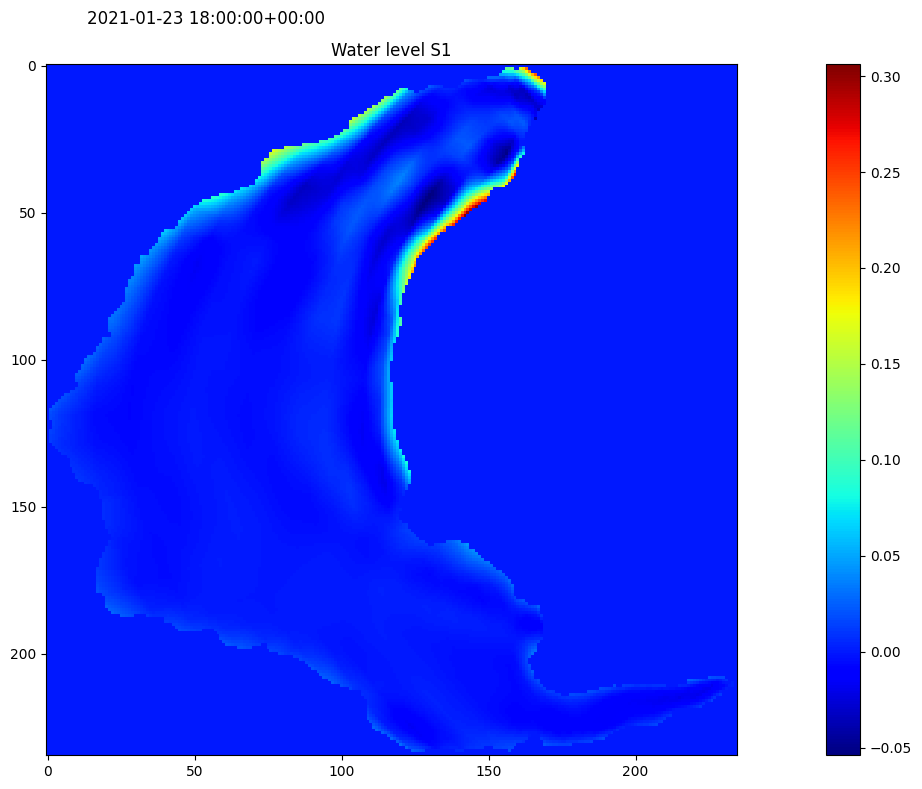

In [9]:
parameters = [{"name": "Water level S1", "variable": "S1", "pattern": [slice(None), slice(None), slice(None)]},
              ]
for p in parameters:
    timestamps, data, coor = extract_data_from_output_file(output_file, p["variable"], p["pattern"])
    p["timestamps"] = timestamps
    p["data"] = data
    p["depth"] = coor[0]
    p["x_coords"] = coor[1]
    p["y_coords"] = coor[2]
date_to_plot = datetime(2024, 1, 15,0,0,tzinfo=timezone.utc)
plot_heatmap(parameters,date_to_plot)

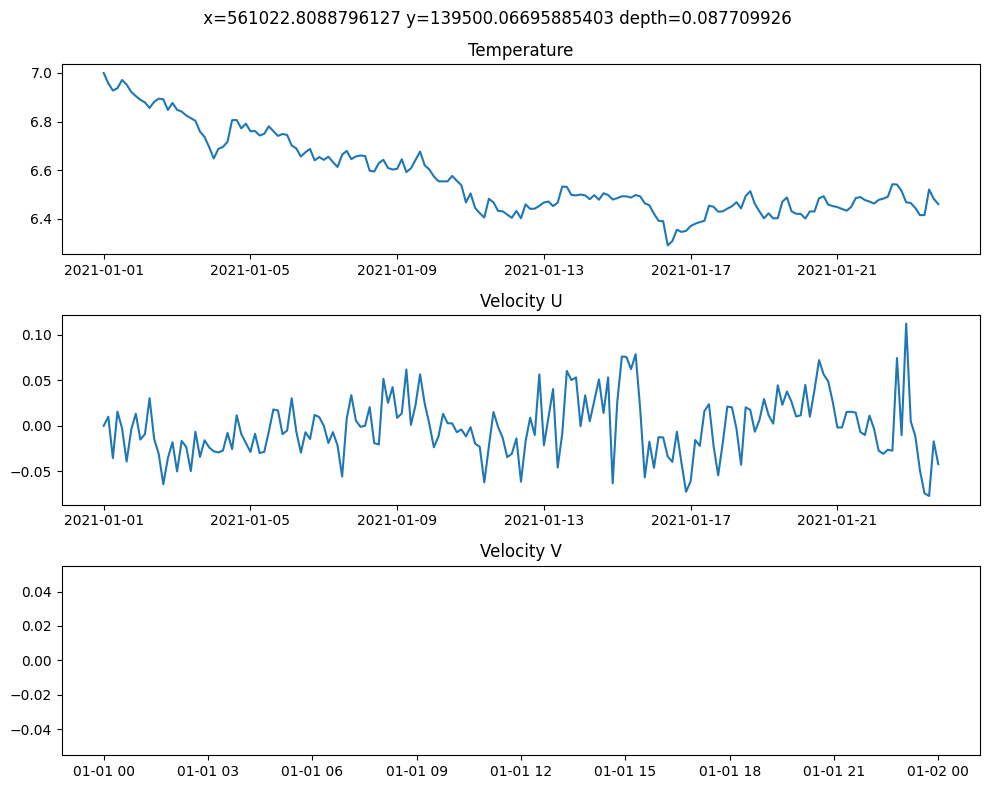

In [4]:
x_coor_to_plot = 718465
y_coor_to_plot = 95367.167
depth = 0
parameters = [{"name": "Temperature", "variable": "R1", "pattern": [slice(None), 0, 'get_depth_index_from_depth', np.nan, np.nan], "depth":None, "x_coords": None, "y_coords": None},
              {"name": "Velocity U", "variable": "U1", "pattern": [slice(None), 'get_depth_index_from_depth', np.nan, np.nan], "depth":None, "x_coords": None, "y_coords": None},
              {"name": "Velocity V", "variable": "V1", "pattern": [slice(None), 'get_depth_index_from_depth', np.nan, np.nan], "depth":None, "x_coords": None, "y_coords": None}]
for p in parameters:
    timestamps, data, coor = extract_timeseries_from_output_file_by_coordinates(output_file, p["variable"], p["pattern"], x_coor_to_plot, y_coor_to_plot, depth)
    p["timestamps"] = timestamps
    p["data"] = data
    p["depth"] = coor[0]
    p["x_coords"] = coor[1]
    p["y_coords"] = coor[2]
plot_timeseries(parameters)

M_transect = 65
N_transect = 54
depth = 0
parameters = [{"name": "Temperature", "variable": "R1", "pattern": [slice(None), 0, 'get_depth_index_from_depth', M_transect, N_transect], "depth":None, "x_coords": None, "y_coords": None},
              {"name": "Velocity U", "variable": "U1", "pattern": [slice(None), 'get_depth_index_from_depth', M_transect, N_transect], "depth":None, "x_coords": None, "y_coords": None},
              {"name": "Velocity V", "variable": "V1", "pattern": [slice(None), 'get_depth_index_from_depth', M_transect, N_transect], "depth":None, "x_coords": None, "y_coords": None},
              {"name": "Wind CD", "variable": "WINDCD", "pattern": [slice(None), M_transect, N_transect], "depth":None, "x_coords": None, "y_coords": None}]
for p in parameters:
    timestamps, data, coor = extract_data_from_output_file(output_file, p["variable"], p["pattern"], depth)
    p["timestamps"] = timestamps
    p["data"] = data
    p["depth"] = coor[0]
    p["x_coords"] = coor[1]
    p["y_coords"] = coor[2]
plot_timeseries(parameters)

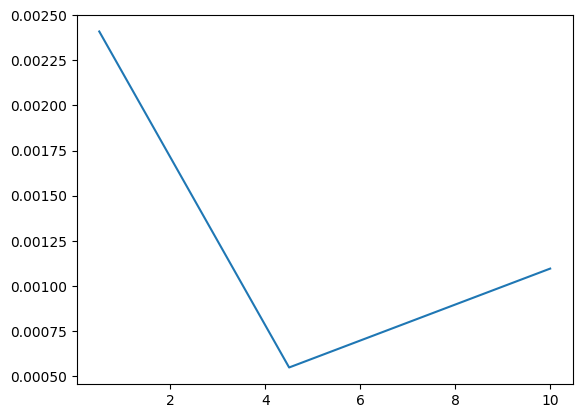

In [5]:
U = [0.5,4.5,10]
Cd = [0.00241, 0.000548, 0.001096]
plt.plot(U,Cd)

In [8]:
parameters = [{"name": "Temperature", "variable": "S1", "pattern": [slice(None), 0, 'get_depth_index_from_depth', slice(None), slice(None)], "depth":None, "x_coords": None, "y_coords": None},
              {"name": "Velocity U", "variable": "U1", "pattern": [slice(None), 'get_depth_index_from_depth', slice(None), slice(None)]},
              {"name": "Velocity V", "variable": "V1", "pattern": [slice(None), 'get_depth_index_from_depth', slice(None), slice(None)]},
              ]
for p in parameters:
    timestamps, data, coor = extract_data_from_output_file(output_file, p["variable"], p["pattern"])
    p["timestamps"] = timestamps
    p["data"] = data
    p["depth"] = coor[0]
    p["x_coords"] = coor[1]
    p["y_coords"] = coor[2]
date_to_plot = datetime(2024, 1, 15,0,0,tzinfo=timezone.utc)
plot_heatmap(parameters,date_to_plot)

ValueError: slicing expression exceeds the number of dimensions of the variable

In [ ]:
M_transect = slice(None)
N_transect = 54
parameters = [{"name": "Temperature", "variable": "R1", "pattern": [slice(None), 0, slice(None), M_transect, N_transect]},
              {"name": "Velocity U", "variable": "U1", "pattern": [slice(None), slice(None), M_transect, N_transect]},
              {"name": "Velocity V", "variable": "V1", "pattern": [slice(None), slice(None), M_transect, N_transect]}]
for p in parameters:
    timestamps, data, coor = extract_data_from_output_file(output_file, p["variable"], p["pattern"])
    p["timestamps"] = timestamps
    p["data"] = data
    p["depth"] = coor[0]
    p["x_coords"] = coor[1]
    p["y_coords"] = coor[2]
    
date_to_plot = datetime(2024, 1, 15,0,0,tzinfo=timezone.utc)
plot_transect(parameters,date_to_plot)

#folder = r"C:\Users\leroquan\Documents\GIT\alplakes-simulations\runs\lugano-adapted2___eawag_delft3dflow6030062434_delft3dflow_lugano_20231231_20240301"
folder2 = r"C:\Users\leroquan\Documents\GIT\alplakes-simulations\runs\lugano_ope_20231231_20240301"
#output_file = os.path.join(folder, "trim-Simulation_Web.nc")
output_file2 = output_file
M_transect = 65
N_transect = 54
#p_to_plot = {"name": "Velocity U", "variable": "U1", "pattern": [slice(None), 'get_depth_index_from_depth', M_transect, N_transect], "depth":None, "x_coords": None, "y_coords": None} 
p_to_plot = {"name": "Temperature", "variable": "WINDCD", "pattern": [slice(None), M_transect, N_transect], "depth":None, "x_coords": None, "y_coords": None}
timestamps, data, coor = extract_data_from_output_file(output_file, p_to_plot["variable"], p_to_plot["pattern"])
timestamps2, data2, coor2 = extract_data_from_output_file(output_file2, p_to_plot["variable"], p_to_plot["pattern"])
fig = plt.figure(figsize=(15, 7))
plt.plot(timestamps,data, label='test')
#plt.plot(timestamps2,data2, label='opé')
plt.title(p_to_plot["variable"])
plt.legend()
plt.show()

parameters = [{"name": "Temperature", "variable": "R1", "pattern": [slice(None), 0, 'get_depth_index_from_depth', slice(None), slice(None)], "depth":None, "x_coords": None, "y_coords": None},
              {"name": "Velocity U", "variable": "U1", "pattern": [slice(None), 'get_depth_index_from_depth', slice(None), slice(None)]},
              {"name": "Velocity V", "variable": "V1", "pattern": [slice(None), 'get_depth_index_from_depth', slice(None), slice(None)]},
              ]
for p in parameters:
    timestamps, data, coor = extract_data_from_output_file(output_file, p["variable"], p["pattern"])
    p["timestamps"] = timestamps
    p["data"] = data
    p["depth"] = coor[0]
    p["x_coords"] = coor[1]
    p["y_coords"] = coor[2]
date_to_plot = datetime(2024, 1, 15,0,0,tzinfo=timezone.utc)
plot_xy_heatmap(parameters,date_to_plot)